# **BRAZILIAN E-COMMERCE OLIST**

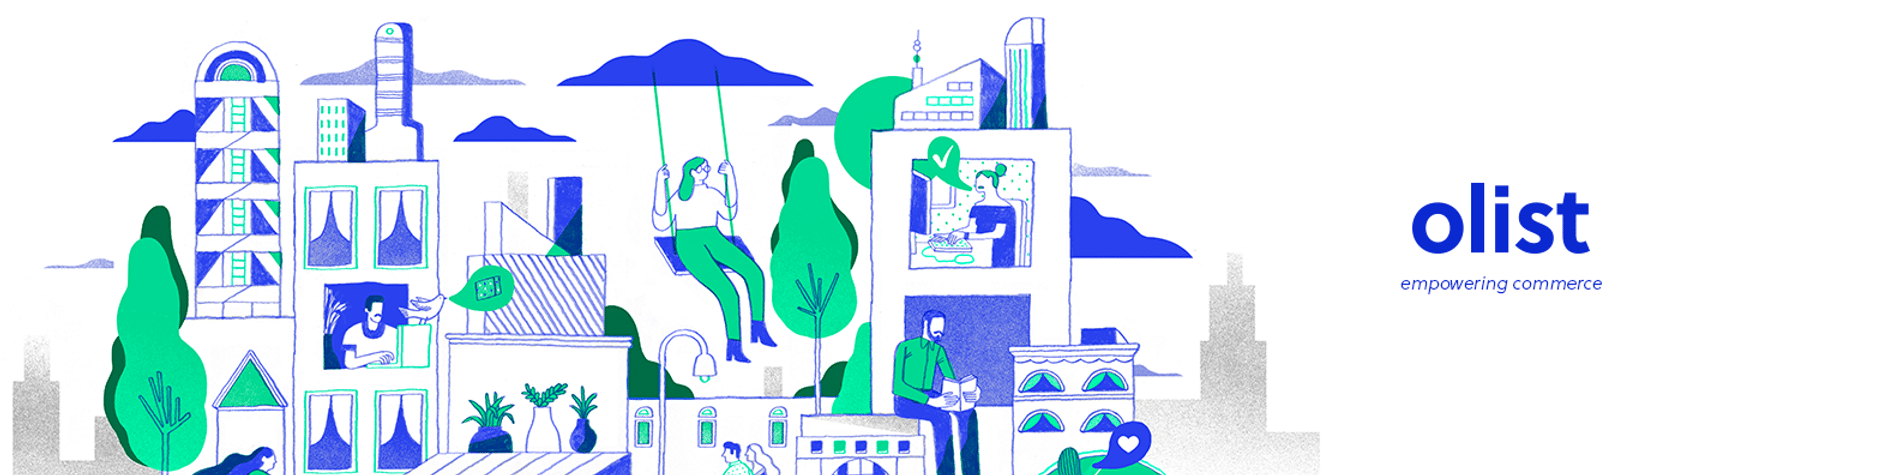

# I - Introduction

##About Dataset

**Dataset:** 

* Brazilian E-Commerce Olist
* Data source: From Kaggle https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_sellers_dataset.csv
* This is a Brazilian ecommerce public dataset of orders made at Olist Store, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more information on the website: www.olist.com.
* The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.






###Import Data

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
products = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Brazilian-E-Commerce-Olist/main/olist_products_dataset.csv')
products_trans = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Brazilian-E-Commerce-Olist/main/product_category_name_translation.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Brazilian-E-Commerce-Olist/main/olist_order_items_dataset.csv')
order = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Brazilian-E-Commerce-Olist/main/olist_orders_dataset.csv')
customer = pd.read_csv('https://raw.githubusercontent.com/Huyenptt113/Brazilian-E-Commerce-Olist/main/olist_customers_dataset.csv')

## Audience

* The target audiences are: Sellers on Olist

## Question

There are some questions we aim to answer through our analysis:

**- BIG QUESTION:** 
How a seller could set appropriate prices for products to increase the number of units sold on Olist platform?
(In terms of location, price,
product impression, product dimensions)

**- Following question:**
+ Which product generates the most revenue?
+ WHich product sells the most?
+ Which product and product category should a shop sell on Olist? 
+ Are there any relationship among the price, number of units sold,products impression and product dimensions?

# A - Data Cleaning

## A1 - Handle duplicated data

In [87]:
# check duplication
products.duplicated().sum()

0

In [88]:
products_trans.duplicated().sum()

0

In [89]:
customer.duplicated().sum()

0

In [90]:
order.duplicated().sum()

0

In [91]:
order_items.duplicated().sum()

0

## A2 - Remove unwanted observations

In [92]:
# Overview of datasets
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [93]:
products_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [94]:
# Create new product table with category names in English and drop unnecessary columns
products_eng = pd.merge(products, products_trans, how='left', on = 'product_category_name')
products_eng = products_eng.drop(columns = 'product_category_name')

In [95]:
products_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [96]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [97]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [98]:
# create new order table with location of customer and drop unnecessary columns
order_with_location = pd.merge(order, customer, how='left', on = 'customer_id')
order_with_location = order_with_location.drop(columns = ['customer_unique_id','customer_zip_code_prefix','order_delivered_carrier_date','order_estimated_delivery_date','order_approved_at','customer_id','order_delivered_customer_date','customer_state'])

In [99]:
order_with_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   order_status              99441 non-null  object
 2   order_purchase_timestamp  99441 non-null  object
 3   customer_city             99441 non-null  object
dtypes: object(4)
memory usage: 3.8+ MB


In [100]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [101]:
# create new order_item table with location of customer and drop unnecessary columns
order_items_details = pd.merge(order_items, order_with_location, how='left', on = 'order_id')
order_items_details = order_items_details.drop(columns = ['shipping_limit_date','seller_id','freight_value'])

In [102]:
order_items_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_item_id             112650 non-null  int64  
 2   product_id                112650 non-null  object 
 3   price                     112650 non-null  float64
 4   order_status              112650 non-null  object 
 5   order_purchase_timestamp  112650 non-null  object 
 6   customer_city             112650 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.9+ MB


---> We will explore 2 datasets: products_eng and order_items_details

## A3 - Correct Datatype

In [103]:
# Check the datatype
products_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [104]:
order_items_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  112650 non-null  object 
 1   order_item_id             112650 non-null  int64  
 2   product_id                112650 non-null  object 
 3   price                     112650 non-null  float64
 4   order_status              112650 non-null  object 
 5   order_purchase_timestamp  112650 non-null  object 
 6   customer_city             112650 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.9+ MB


In [105]:
# Change datatype
order_items_details['order_purchase_timestamp'] = pd.to_datetime(order_items_details['order_purchase_timestamp'])

In [106]:
#re-check datatype after changing type
order_items_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_item_id             112650 non-null  int64         
 2   product_id                112650 non-null  object        
 3   price                     112650 non-null  float64       
 4   order_status              112650 non-null  object        
 5   order_purchase_timestamp  112650 non-null  datetime64[ns]
 6   customer_city             112650 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.9+ MB


## A4 - Handle Missing Values

In [107]:
#check null value
products_eng.isna().sum()

product_id                         0
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [108]:
# Drop rows with Null data (only 1.85% of total dataframe)
products_eng = products_eng.dropna(axis = 0)

In [109]:
# Check null value again
products_eng.isna().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [110]:
order_items_details.isna().sum()

order_id                    0
order_item_id               0
product_id                  0
price                       0
order_status                0
order_purchase_timestamp    0
customer_city               0
dtype: int64

##A5 - Handle errors, corrupted data and outliers

In [111]:
products_eng.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000,32327.000000
mean,48.473722,771.517277,2.188790,2276.960807,30.856498,16.955950,23.208464
std,10.246346,635.189674,1.736767,4279.734063,16.958460,13.637246,12.080665
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [112]:
order_items_details.describe()

,order_item_id,price
count,112650.000000,112650.000000
mean,1.197834,120.653739
std,0.705124,183.633928
min,1.000000,0.850000
25%,1.000000,39.900000
50%,1.000000,74.990000
75%,1.000000,134.900000
max,21.000000,6735.000000


In [113]:
order_items_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  112650 non-null  object        
 1   order_item_id             112650 non-null  int64         
 2   product_id                112650 non-null  object        
 3   price                     112650 non-null  float64       
 4   order_status              112650 non-null  object        
 5   order_purchase_timestamp  112650 non-null  datetime64[ns]
 6   customer_city             112650 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 6.9+ MB


In [114]:
order_items_details['order_purchase_timestamp'].sort_values()

20265    2016-09-04 21:15:19
20266    2016-09-04 21:15:19
101394   2016-09-05 00:15:34
84389    2016-09-15 12:16:38
84391    2016-09-15 12:16:38
                 ...        
4925     2018-08-29 14:18:23
9829     2018-08-29 14:18:28
1722     2018-08-29 14:52:00
23530    2018-08-29 15:00:37
37073    2018-09-03 09:06:57
Name: order_purchase_timestamp, Length: 112650, dtype: datetime64[ns]

#### Check outlier

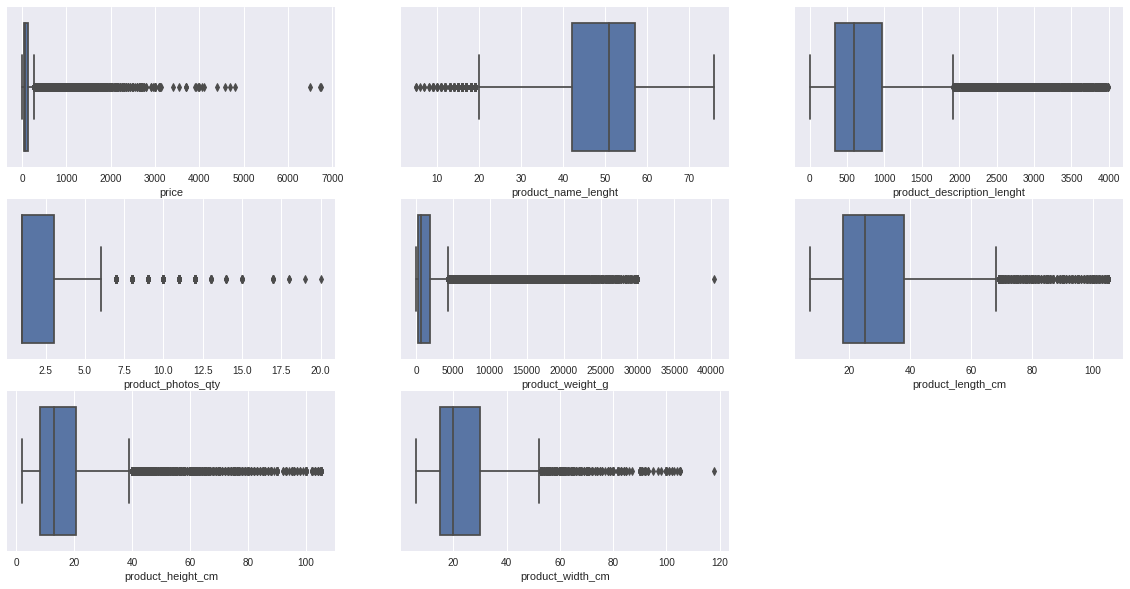

In [115]:
# Outliers - review columns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

plt.figure(figsize=(20, 10))
plt.subplot(331)
price = order_items_details['price'].reset_index()
sns.boxplot(data=price, x = 'price')

plt.subplot(332)
price = products_eng['product_name_lenght'].reset_index()
sns.boxplot(data=price, x = 'product_name_lenght')

plt.subplot(333)
price = products_eng['product_description_lenght'].reset_index()
sns.boxplot(data=price, x = 'product_description_lenght')

plt.subplot(334)
price = products_eng['product_photos_qty'].reset_index()
sns.boxplot(data=price, x = 'product_photos_qty')

plt.subplot(335)
price = products_eng['product_weight_g'].reset_index()
sns.boxplot(data=price, x = 'product_weight_g')

plt.subplot(336)
price = products_eng['product_length_cm'].reset_index()
sns.boxplot(data=price, x = 'product_length_cm')

plt.subplot(337)
price = products_eng['product_height_cm'].reset_index()
sns.boxplot(data=price, x = 'product_height_cm')

plt.subplot(338)
price = products_eng['product_width_cm'].reset_index()
sns.boxplot(data=price, x = 'product_width_cm')

plt.show()

#B - Exploratory Data Analysis

##B1 - Which product sells the most?

### Top 10 categories

In [116]:
# Top 10 categories with highest number of products
products_eng.groupby('product_category_name_english')['product_id'].count().reset_index().sort_values('product_id',ascending = False).head(10)

,product_category_name_english,product_id
7,bed_bath_table,3029
65,sports_leisure,2867
39,furniture_decor,2657
43,health_beauty,2444
49,housewares,2335
5,auto,1900
15,computers_accessories,1639
69,toys,1411
70,watches_gifts,1329
68,telephony,1134


In [117]:
#create new order items table with name of category
order_items_with_name = pd.merge(order_items_details, products_eng, how = 'left', on= 'product_id')

In [118]:
order_items_with_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   order_item_id                  112650 non-null  int64         
 2   product_id                     112650 non-null  object        
 3   price                          112650 non-null  float64       
 4   order_status                   112650 non-null  object        
 5   order_purchase_timestamp       112650 non-null  datetime64[ns]
 6   customer_city                  112650 non-null  object        
 7   product_name_lenght            111022 non-null  float64       
 8   product_description_lenght     111022 non-null  float64       
 9   product_photos_qty             111022 non-null  float64       
 10  product_weight_g               111022 non-null  float64       
 11  

In [119]:
#  Top 10 categories with highest number of units sold
order_items_with_name.groupby(['product_category_name_english'])['product_id'].count().reset_index().sort_values('product_id',ascending=False).head(10)

,product_category_name_english,product_id
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


### Top 10 categories with location

In [120]:
#  Top 10 categories with highest number of units sold with location
order_items_with_name.groupby(['product_category_name_english','customer_city'])['order_id'].count().reset_index().sort_values('order_id',ascending=False).head(10)

,product_category_name_english,customer_city,order_id
3635,bed_bath_table,sao paulo,1984
14133,health_beauty,sao paulo,1753
20986,sports_leisure,sao paulo,1397
16166,housewares,sao paulo,1321
11465,furniture_decor,sao paulo,1268
5634,computers_accessories,sao paulo,1227
3483,bed_bath_table,rio de janeiro,854
25047,watches_gifts,sao paulo,844
23904,toys,sao paulo,658
22948,telephony,sao paulo,620


##B2 - Which products generate the most revenue?


In [121]:
# Top 10 categories with highest revenue
order_items_with_name.groupby('product_category_name_english')['price'].sum().reset_index().sort_values('price',ascending=False).head(10)

,product_category_name_english,price
43,health_beauty,1258681.34
70,watches_gifts,1205005.68
7,bed_bath_table,1036988.68
65,sports_leisure,988048.97
15,computers_accessories,911954.32
39,furniture_decor,729762.49
20,cool_stuff,635290.85
49,housewares,632248.66
5,auto,592720.11
42,garden_tools,485256.46


In [122]:
#  Top 10 categories with highest revenue by location
order_items_with_name.groupby(['product_category_name_english','customer_city'])['price'].sum().reset_index().sort_values('price',ascending=False).head(10)

,product_category_name_english,customer_city,price
14133,health_beauty,sao paulo,189361.87
3635,bed_bath_table,sao paulo,170705.41
25047,watches_gifts,sao paulo,165897.46
5634,computers_accessories,sao paulo,144635.68
20986,sports_leisure,sao paulo,144533.26
16166,housewares,sao paulo,104820.45
11465,furniture_decor,sao paulo,100033.05
24921,watches_gifts,rio de janeiro,93028.74
13965,health_beauty,rio de janeiro,86558.34
3483,bed_bath_table,rio de janeiro,77871.29


##B3 - Health Beauty Products

In [123]:
#Create new dataset of health beauty products
heath_beauty = order_items_with_name[order_items_with_name['product_category_name_english'] =='health_beauty']
heath_beauty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9670 entries, 8 to 112624
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       9670 non-null   object        
 1   order_item_id                  9670 non-null   int64         
 2   product_id                     9670 non-null   object        
 3   price                          9670 non-null   float64       
 4   order_status                   9670 non-null   object        
 5   order_purchase_timestamp       9670 non-null   datetime64[ns]
 6   customer_city                  9670 non-null   object        
 7   product_name_lenght            9670 non-null   float64       
 8   product_description_lenght     9670 non-null   float64       
 9   product_photos_qty             9670 non-null   float64       
 10  product_weight_g               9670 non-null   float64       
 11  product_length_

In [124]:
heath_beauty.head()

,order_id,order_item_id,product_id,price,order_status,order_purchase_timestamp,customer_city,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,delivered,2018-03-19 18:40:33,santos,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,59.99,delivered,2018-03-24 22:16:10,piracicaba,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,18.99,delivered,2017-05-14 17:19:44,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,18.99,delivered,2017-05-14 17:19:44,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty
53,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,35.90,delivered,2018-05-19 10:29:23,coromandel,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,health_beauty


In [125]:
#Top 5 cities with highest number of units sold of Health Beauty
heath_beauty.groupby('customer_city')['product_id'].count().reset_index().sort_values('product_id',ascending=False).head()

,customer_city,product_id
1329,sao paulo,1753
1161,rio de janeiro,572
167,belo horizonte,274
212,brasilia,246
275,campinas,148


In [126]:
# number of units sold of each product in heath beauty
unit_sold = heath_beauty.groupby(['product_id','customer_city'])['order_id'].count().reset_index()
unit_sold.rename(columns={'order_id':'unit_sold'}, inplace=True)
unit_sold

,product_id,customer_city,unit_sold
0,00210e41887c2a8ef9f791ebc780cc36,brasilia,2
1,00210e41887c2a8ef9f791ebc780cc36,ribeirao das neves,1
2,00210e41887c2a8ef9f791ebc780cc36,santo andre,2
3,00210e41887c2a8ef9f791ebc780cc36,sao paulo,1
4,00210e41887c2a8ef9f791ebc780cc36,tres de maio,1
...,...,...,...
7446,ffd34459c21034d1da6df9800de0d7a3,brasilia,1
7447,ffd34459c21034d1da6df9800de0d7a3,fortaleza,1
7448,ffd34459c21034d1da6df9800de0d7a3,manaus,1
7449,ffd7628b0b0b98ebc549e8e4c54a59af,sao jose dos campos,1


In [127]:
#Cteate new table
heath_beauty_unit_sold = pd.merge(heath_beauty,unit_sold,how='left',on=['product_id','customer_city'])
heath_beauty_unit_sold


,order_id,order_item_id,product_id,price,order_status,order_purchase_timestamp,customer_city,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,unit_sold
0,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,delivered,2018-03-19 18:40:33,santos,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty,1
1,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,59.99,delivered,2018-03-24 22:16:10,piracicaba,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty,1
2,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,18.99,delivered,2017-05-14 17:19:44,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty,11
3,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,18.99,delivered,2017-05-14 17:19:44,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty,11
4,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,35.90,delivered,2018-05-19 10:29:23,coromandel,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,health_beauty,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665,ffce8a2dd7579795f5c1cbe2bf23d51d,1,00878d953636afec00d3e85d55a12e7f,100.00,delivered,2018-05-07 21:04:46,ponta grossa,59.0,1631.0,4.0,2550.0,38.0,42.0,25.0,health_beauty,1
9666,ffdd178654127ccf34a439e8704fecd9,1,16b4473e98422039c388f144a0b16f55,69.90,delivered,2018-03-07 14:07:47,maceio,57.0,1293.0,1.0,2350.0,28.0,10.0,16.0,health_beauty,1
9667,ffe146c862ce518ad378598499bf9204,1,8ab83b53b9a953395f4f21f0b1a845ef,83.80,delivered,2018-06-28 21:44:06,cacu,38.0,702.0,1.0,150.0,16.0,16.0,11.0,health_beauty,1
9668,ffec1a6d35149778ec575d5048d44db8,1,437c05a395e9e47f9762e677a7068ce7,47.65,delivered,2018-03-20 12:47:53,sao paulo,40.0,409.0,1.0,1110.0,19.0,11.0,18.0,health_beauty,32


In [128]:
heath_beauty_unit_sold = heath_beauty_unit_sold.drop(columns=['order_id','order_item_id','order_purchase_timestamp','order_status','product_category_name_english'])
heath_beauty_unit_sold = heath_beauty_unit_sold[~heath_beauty_unit_sold.duplicated()]
heath_beauty_unit_sold.head()

,product_id,price,customer_city,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,unit_sold
0,310ae3c140ff94b03219ad0adc3c778f,145.95,santos,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,1
1,d63c1011f49d98b976c352955b1c4bea,59.99,piracicaba,57.0,614.0,1.0,950.0,35.0,25.0,20.0,1
2,e67307ff0f15ade43fcb6e670be7a74c,18.99,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,11
4,bdcf6a834e8faa30dac3886c7a58e92e,35.90,coromandel,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,1
5,7614c62b86a81021243e438cfde78ccc,492.75,guarulhos,53.0,1135.0,5.0,9900.0,30.0,39.0,38.0,2


##B4 - Discover and Visualize the Data to Gain Insights

Take a look at a histogram for each numerical attribute

In [129]:
heath_beauty_unit_sold.describe()

,price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,unit_sold
count,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000,7839.000000
mean,138.747732,48.686822,1125.738615,1.842710,1126.680572,23.897436,14.371093,18.244802,1.531956
std,190.190447,9.824306,826.025851,1.443106,3063.389180,9.087378,10.028420,7.559977,2.419296
min,1.200000,12.000000,48.000000,1.000000,50.000000,11.000000,2.000000,7.000000,1.000000
25%,46.900000,42.000000,506.000000,1.000000,225.000000,18.000000,10.000000,15.000000,1.000000
50%,84.900000,50.000000,905.000000,1.000000,450.000000,21.000000,12.000000,16.000000,1.000000
75%,146.300000,57.000000,1474.000000,2.000000,1025.000000,27.000000,17.000000,20.000000,1.000000
max,3124.000000,69.000000,3963.000000,10.000000,30000.000000,98.000000,105.000000,105.000000,51.000000


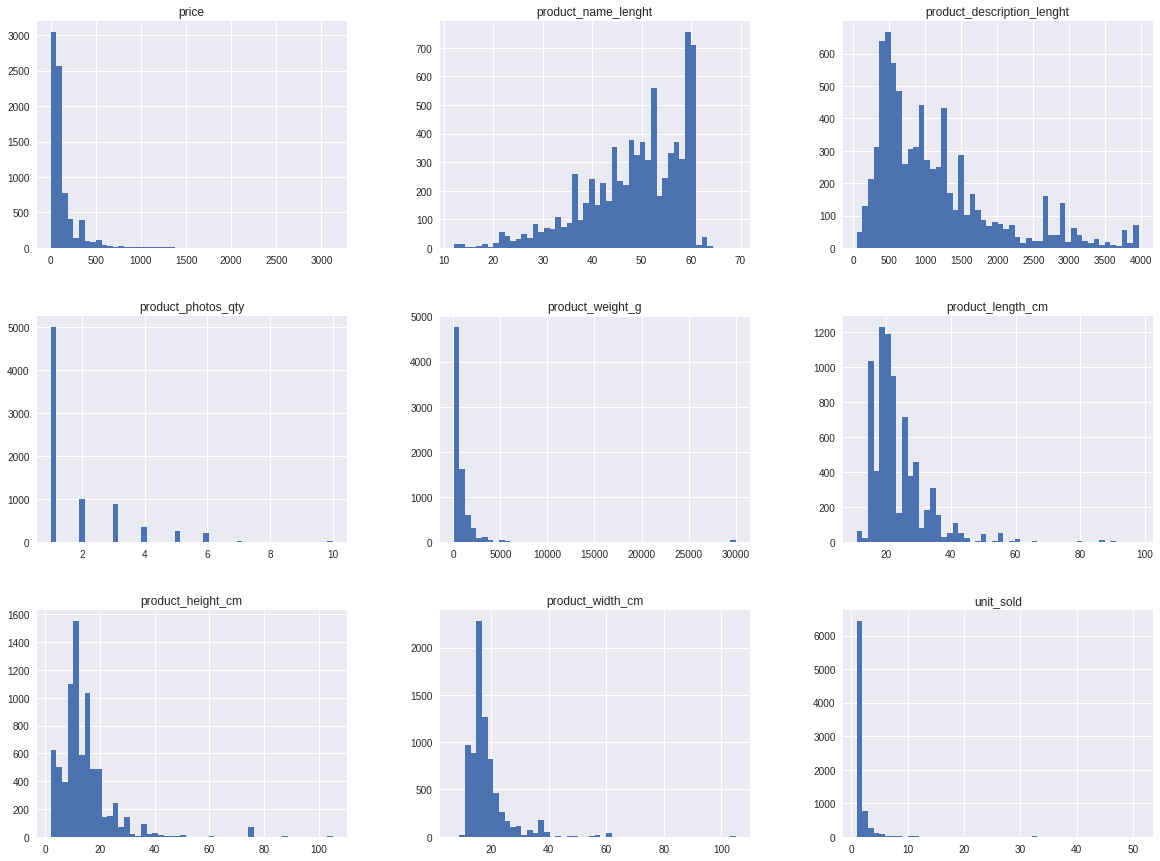

In [130]:
heath_beauty_unit_sold.hist(bins=50, figsize=(20,15))
plt.show()

In [131]:
heath_beauty_unit_sold.corr()

,price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,unit_sold
price,1.000000,0.042994,0.160094,0.142366,0.371463,0.336662,0.245413,0.346157,-0.044995
product_name_lenght,0.042994,1.000000,0.196401,0.236475,0.025146,0.077047,-0.041786,0.028558,-0.007757
product_description_lenght,0.160094,0.196401,1.000000,0.331996,-0.019571,0.056051,-0.032791,0.001796,-0.029426
product_photos_qty,0.142366,0.236475,0.331996,1.000000,0.005210,0.230694,-0.054442,0.099459,-0.024926
product_weight_g,0.371463,0.025146,-0.019571,0.005210,1.000000,0.508505,0.699617,0.555300,-0.029544
product_length_cm,0.336662,0.077047,0.056051,0.230694,0.508505,1.000000,0.394791,0.438328,-0.039289
product_height_cm,0.245413,-0.041786,-0.032791,-0.054442,0.699617,0.394791,1.000000,0.416173,-0.031975
product_width_cm,0.346157,0.028558,0.001796,0.099459,0.555300,0.438328,0.416173,1.000000,-0.006193
unit_sold,-0.044995,-0.007757,-0.029426,-0.024926,-0.029544,-0.039289,-0.031975,-0.006193,1.000000


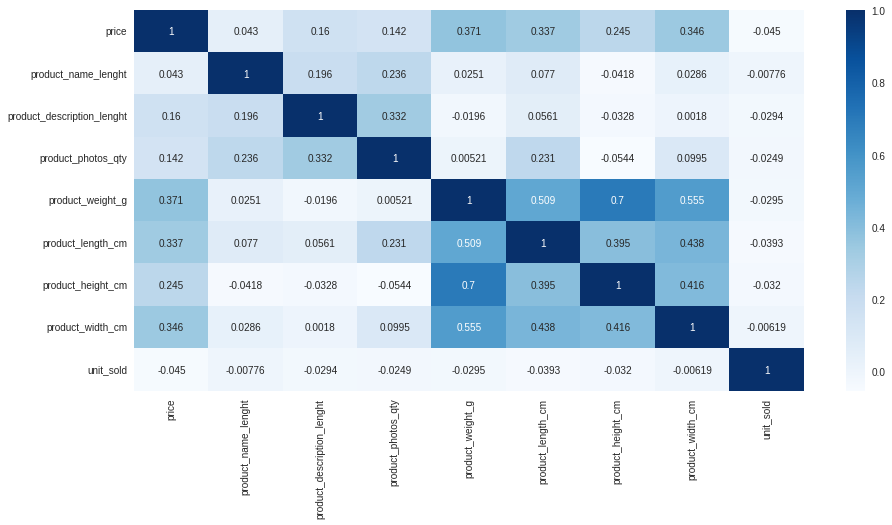

In [160]:
plt.figure(figsize=(15,7))
sns.heatmap(heath_beauty_unit_sold.corr(), annot=True, fmt=".3g",cmap ='Blues')
plt.show()

In [133]:
#  get the correlation column of price then sort by value
heath_beauty_unit_sold.corr()['price'].sort_values(ascending=False)

price                         1.000000
product_weight_g              0.371463
product_width_cm              0.346157
product_length_cm             0.336662
product_height_cm             0.245413
product_description_lenght    0.160094
product_photos_qty            0.142366
product_name_lenght           0.042994
unit_sold                    -0.044995
Name: price, dtype: float64

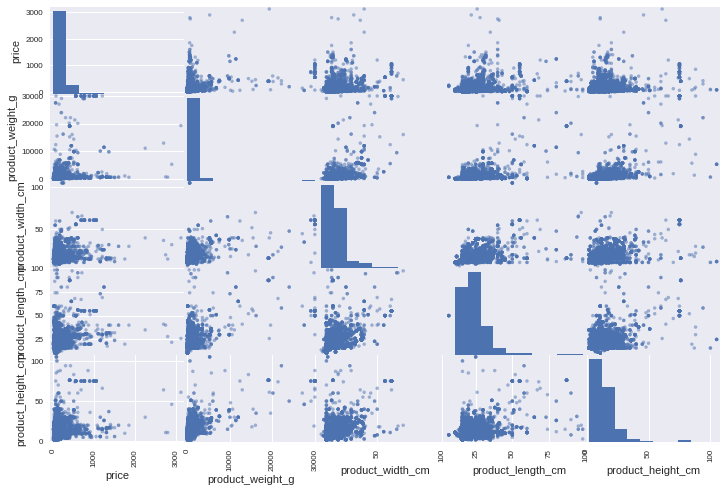

In [134]:
from pandas.plotting import scatter_matrix

attributes = ["price",
              "product_weight_g",'product_width_cm','product_length_cm','product_height_cm']
scatter_matrix(heath_beauty_unit_sold[attributes], figsize=(12, 8))

plt.show()

The most promising attribute to predict the price is the product_weight_g


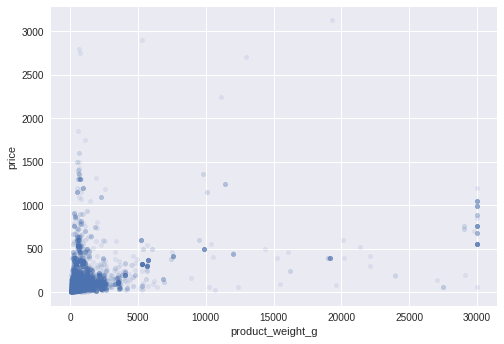

In [135]:
heath_beauty_unit_sold.plot(kind="scatter", x="product_weight_g", y="price",
             alpha=0.1)

In [136]:
heath_beauty_clean = heath_beauty_unit_sold.drop(columns=['product_id', 'customer_city', 'unit_sold'])

In [137]:
heath_beauty_clean.head()

,price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,145.95,59.0,493.0,1.0,2000.0,30.0,12.0,16.0
1,59.99,57.0,614.0,1.0,950.0,35.0,25.0,20.0
2,18.99,47.0,1474.0,3.0,150.0,43.0,13.0,14.0
4,35.90,26.0,394.0,1.0,1614.0,31.0,16.0,28.0
5,492.75,53.0,1135.0,5.0,9900.0,30.0,39.0,38.0


In [138]:
heath_beauty_clean.drop_duplicates(inplace=True)

In [139]:
heath_beauty_scale = heath_beauty_clean.copy()

In [140]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(heath_beauty_scale)
heath_beauty_scale = pd.DataFrame(scaled)
heath_beauty_scale.columns=['price', 'product_name_lenght',	'product_description_lenght',	'product_photos_qty',	'product_weight_g',	'product_length_cm',	'product_height_cm',	'product_width_cm']

In [141]:
heath_beauty_scale.describe()

,price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,3.167000e+03,3.167000e+03,3.167000e+03,3.167000e+03,3.167000e+03,3.167000e+03,3.167000e+03,3.167000e+03
mean,-2.827265e-17,3.179578e-16,-4.420998e-17,4.213028e-16,-1.053432e-17,-6.671154e-17,-9.647407e-17,1.844646e-16
std,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00,1.000158e+00
min,-6.545895e-01,-3.438144e+00,-1.331499e+00,-5.155610e-01,-3.633442e-01,-1.299875e+00,-1.237040e+00,-1.399926e+00
25%,-4.585585e-01,-6.973217e-01,-7.190764e-01,-5.155610e-01,-3.007891e-01,-5.822863e-01,-5.055789e-01,-5.085265e-01
50%,-3.091818e-01,1.836570e-01,-2.886928e-01,-5.155610e-01,-2.188752e-01,-3.772609e-01,-2.312810e-01,-2.538411e-01
75%,2.650728e-03,8.688626e-01,4.225853e-01,2.484922e-01,-4.551242e-02,3.403279e-01,2.258822e-01,2.555299e-01
max,1.305112e+01,2.141387e+00,3.388254e+00,6.360918e+00,8.290347e+00,7.618729e+00,8.180522e+00,1.107966e+01


In [142]:
#  get the correlation column of price then sort by value
heath_beauty_scale.corr()['price'].sort_values(ascending=False)

price                         1.000000
product_weight_g              0.360067
product_length_cm             0.329109
product_width_cm              0.302184
product_height_cm             0.269532
product_photos_qty            0.132643
product_description_lenght    0.124908
product_name_lenght           0.064452
Name: price, dtype: float64

#C - Interpret result

In [143]:
import statsmodels.api as sm

X2 = sm.add_constant(heath_beauty_scale.drop(['price'], axis=1))
model_stats = sm.OLS(heath_beauty_scale['price'].values.reshape(-1,1), X2).fit()
model_stats.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     102.9
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          6.02e-136
Time:                        07:49:01   Log-Likelihood:                -4168.6
No. Observations:                3167   AIC:                             8353.
Df Residuals:                    3159   BIC:                             8402.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -4.218e-17      0.016  -2.63e-15      1.000      -0.031       0.031
product_name_lenght           -0.0003      0.017     -0.015      0.988      -0.033       0.032
product_description_lenght     0.1161      0.017      6.968      0.000       0.083       0.149
product_photos_qty             0.0837      0.017      4.929      0.000       0.050       0.117
product_weight_g               0.2134      0.025      8.380      0.000       0.163       0.263
product_length_cm              0.1520      0.020      7.633      0.000       0.113       0.191
product_height_cm              0.0337      0.022      1.529      0.126      -0.010       0.077
product_width_cm               0.0797      0.021      3.828      0.000       0.039       0.121
==============================================================================
Omnibus:                     3385.782   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           300597.687
Skew:                           5.274   Prob(JB):                         0.00
Kurtosis:                      49.548   Cond. No.                         3.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#D - Export data

In [149]:
order_items_with_name['year'] = order_items_with_name['order_purchase_timestamp'].dt.year
order_items_with_name['month'] = order_items_with_name['order_purchase_timestamp'].dt.month

In [150]:
order_items_with_name.head()

,order_id,order_item_id,product_id,price,order_status,order_purchase_timestamp,customer_city,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,year,month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,delivered,2017-09-13 08:59:02,campos dos goytacazes,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,2017,9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,delivered,2017-04-26 10:53:06,santa fe do sul,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,2017,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,delivered,2018-01-14 14:33:31,para de minas,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,2018,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,delivered,2018-08-08 10:00:35,atibaia,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,2018,8
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,delivered,2017-02-04 13:57:51,varzea paulista,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,2017,2


In [151]:
heath_beauty['year'] = heath_beauty['order_purchase_timestamp'].dt.year
heath_beauty['month'] = heath_beauty['order_purchase_timestamp'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
heath_beauty.head()

,order_id,order_item_id,product_id,price,order_status,order_purchase_timestamp,customer_city,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,year,month
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,145.95,delivered,2018-03-19 18:40:33,santos,59.0,493.0,1.0,2000.0,30.0,12.0,16.0,health_beauty,2018,3
10,00061f2a7bc09da83e415a52dc8a4af1,1,d63c1011f49d98b976c352955b1c4bea,59.99,delivered,2018-03-24 22:16:10,piracicaba,57.0,614.0,1.0,950.0,35.0,25.0,20.0,health_beauty,2018,3
48,001d8f0e34a38c37f7dba2a37d4eba8b,1,e67307ff0f15ade43fcb6e670be7a74c,18.99,delivered,2017-05-14 17:19:44,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty,2017,5
49,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,18.99,delivered,2017-05-14 17:19:44,sao paulo,47.0,1474.0,3.0,150.0,43.0,13.0,14.0,health_beauty,2017,5
53,001e7cf2ad6bef3ade12ebc56ceaf0f3,1,bdcf6a834e8faa30dac3886c7a58e92e,35.90,delivered,2018-05-19 10:29:23,coromandel,26.0,394.0,1.0,1614.0,31.0,16.0,28.0,health_beauty,2018,5


In [145]:
from google.colab import files

In [ ]:

products_eng.to_csv('products_eng.csv') 
files.download('products_eng.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
order_items_with_name.to_csv('order_items_with_name.csv') 
files.download('order_items_with_name.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
heath_beauty.to_csv('heath_beauty.csv') 
files.download('heath_beauty.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
heath_beauty_unit_sold.to_csv('heath_beauty_unit_sold.csv') 
files.download('heath_beauty_unit_sold.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
heath_beauty_clean.to_csv('heath_beauty_clean.csv') 
files.download('heath_beauty_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>